In [1]:

import torch
import matplotlib.pyplot as plt

# %pwd
# '/home/yuhao/Documents/work/SUTD/AMM/codespace/LibAMM/build/benchmark/scripts/CCA'

torch.ops.load_library("../../../libIntelliStream.so")

A = torch.load('A.pt')
B = torch.load('B.pt')

In [2]:
def printStatsOfTensor(tensor, name):
    mean = torch.mean(tensor)
    std = torch.std(tensor)
    min_val = torch.min(tensor)
    max_val = torch.max(tensor)
    print(name)
    print("Mean:", mean.item())
    print("Standard Deviation:", std.item())
    print("Minimum:", min_val.item())
    print("Maximum:", max_val.item())

printStatsOfTensor(A, 'A')
printStatsOfTensor(B, 'B')

A
Mean: 29.814027786254883
Standard Deviation: 74.91387176513672
Minimum: 0.0
Maximum: 255.0
B
Mean: 36.82281494140625
Standard Deviation: 81.90879821777344
Minimum: 0.0
Maximum: 255.0


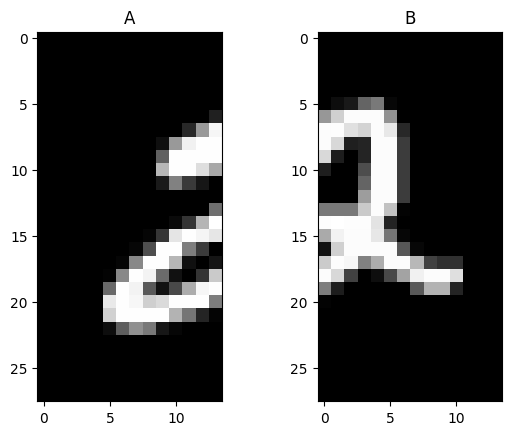

In [3]:
# Reshape the tensor to a 2D tensor
image_index=5
A_single_image = A[image_index].view(28, 14)
B_single_image = B[image_index].view(28, 14)

# Plot the image in grayscale
fig, axes = plt.subplots(1, 2)

# Plot image1
axes[0].imshow(A_single_image.numpy(), cmap='gray')
axes[0].set_title('A')

# Plot image2
axes[1].imshow(B_single_image, cmap='gray')
axes[1].set_title('B')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3)

plt.show()

In [4]:
A = A - A.mean(0)
B = B - B.mean(0)
A = A.t()
B = B.t()
printStatsOfTensor(A, 'A')
printStatsOfTensor(B, 'B')

A
Mean: -1.5943876974233717e-07
Standard Deviation: 64.03339385986328
Minimum: -130.37229919433594
Maximum: 254.9645538330078
B
Mean: -8.503401005555133e-08
Standard Deviation: 68.1598129272461
Minimum: -139.55360412597656
Maximum: 254.9786376953125


In [73]:
# def get_correlation(A, B, tag):

#     torch.ops.LibAMM.setTag(tag)

#     # Sxx = torch.matmul(A, A.t()) / A.size(1)
#     # Syy = torch.matmul(B, B.t()) / A.size(1)
#     # Sxy = torch.matmul(A, B.t()) / A.size(1)
#     torch.manual_seed(123)
#     Sxx = torch.ops.LibAMM.ammDefault(A, A.t()) / A.size(1)
#     torch.manual_seed(123)
#     Syy = torch.ops.LibAMM.ammDefault(B, B.t()) / A.size(1)
#     torch.manual_seed(123)
#     Sxy = torch.ops.LibAMM.ammDefault(A, B.t()) / A.size(1)
#     printStatsOfTensor(Sxx, 'Sxx')
#     printStatsOfTensor(Syy, 'Syy')
#     printStatsOfTensor(Sxy, 'Sxy')

#     # Sxx^(-1/2), Syy^(-1/2), M
#     # Sxx^(-1/2)
#     eigenvaluesSxx, eigenvectorsSxx = torch.linalg.eig(Sxx)
#     diagonalMatrixSxx = torch.diag(1.0 / torch.sqrt(eigenvaluesSxx + 1e-12))
#     SxxNegativeHalf = torch.matmul(torch.matmul(eigenvectorsSxx, diagonalMatrixSxx), eigenvectorsSxx.t())
#     SxxNegativeHalf = SxxNegativeHalf.real  # Ignore complex part, if any
#     # Syy^(-1/2)
#     eigenvaluesSyy, eigenvectorsSyy = torch.linalg.eig(Syy)
#     diagonalMatrixSyy = torch.diag(1.0 / torch.sqrt(eigenvaluesSyy + 1e-12))
#     SyyNegativeHalf = torch.matmul(torch.matmul(eigenvectorsSyy, diagonalMatrixSyy), eigenvectorsSyy.t())
#     SyyNegativeHalf = SyyNegativeHalf.real
#     # M
#     # M = torch.matmul(SxxNegativeHalf, Sxy)
#     # M = torch.matmul(M, SyyNegativeHalf)
#     torch.manual_seed(123)
#     M = torch.ops.LibAMM.ammDefault(SxxNegativeHalf, Sxy)
#     torch.manual_seed(123)
#     M = torch.ops.LibAMM.ammDefault(M, SyyNegativeHalf)
#     printStatsOfTensor(M, 'M')

#     # correlation
#     U, S, Vh = torch.linalg.svd(M, False)
#     printStatsOfTensor(S, 'S')

#     S = torch.clamp(S, min=-1.0, max=1.0)
#     return S

def get_correlation(A, B, tag, ss):

    torch.ops.LibAMM.setTag(tag)

    torch.manual_seed(123)
    Sxx = torch.ops.LibAMM.ammSpecifySs(A, A.t(), ss) / A.size(1)
    torch.manual_seed(123)
    Syy = torch.ops.LibAMM.ammSpecifySs(B, B.t(), ss) / A.size(1)
    torch.manual_seed(123)
    Sxy = torch.ops.LibAMM.ammSpecifySs(A, B.t(), ss) / A.size(1)
    printStatsOfTensor(Sxx, 'Sxx')
    printStatsOfTensor(Syy, 'Syy')
    printStatsOfTensor(Sxy, 'Sxy')

    # Sxx^(-1/2), Syy^(-1/2), M
    # Sxx^(-1/2)
    eigenvaluesSxx, eigenvectorsSxx = torch.linalg.eig(Sxx)
    diagonalMatrixSxx = torch.diag(1.0 / torch.sqrt(eigenvaluesSxx + 1e-12))
    SxxNegativeHalf = torch.matmul(torch.matmul(eigenvectorsSxx, diagonalMatrixSxx), eigenvectorsSxx.t())
    SxxNegativeHalf = SxxNegativeHalf.real  # Ignore complex part, if any
    # Syy^(-1/2)
    eigenvaluesSyy, eigenvectorsSyy = torch.linalg.eig(Syy)
    diagonalMatrixSyy = torch.diag(1.0 / torch.sqrt(eigenvaluesSyy + 1e-12))
    SyyNegativeHalf = torch.matmul(torch.matmul(eigenvectorsSyy, diagonalMatrixSyy), eigenvectorsSyy.t())
    SyyNegativeHalf = SyyNegativeHalf.real
    # M
    M = torch.matmul(SxxNegativeHalf, Sxy)
    M = torch.matmul(M, SyyNegativeHalf)
    printStatsOfTensor(M, 'M')

    # correlation
    U, S, Vh = torch.linalg.svd(M, False)
    printStatsOfTensor(S, 'S')

    S = torch.clamp(S, min=-1.0, max=1.0)
    return S

In [88]:
S_MM = get_correlation(A, B, 'mm', 10)

Sxx
Mean: 131.5745849609375
Standard Deviation: 903.1205444335938
Minimum: -3912.50537109375
Maximum: 12752.3505859375
Syy
Mean: 135.45680236816406
Standard Deviation: 960.02587890625
Minimum: -5121.08544921875
Maximum: 12953.3994140625
Sxy
Mean: 110.29679107666016
Standard Deviation: 589.449462890625
Minimum: -5307.15380859375
Maximum: 10653.111328125
M
Mean: 0.0010679035913199186
Standard Deviation: 0.012338140048086643
Minimum: -0.5831437706947327
Maximum: 0.7997881174087524
S
Mean: 0.13405658304691315
Standard Deviation: 0.20556588470935822
Minimum: 2.448219760253778e-08
Maximum: 1.0031112432479858


In [89]:
S_CRS = get_correlation(A, B, 'smp-pca', 6000)

Sxx
Mean: nan
Standard Deviation: nan
Minimum: nan
Maximum: nan
Syy
Mean: nan
Standard Deviation: nan
Minimum: nan
Maximum: nan
Sxy
Mean: nan
Standard Deviation: nan
Minimum: nan
Maximum: nan


RuntimeError: torch.linalg.eig: input tensor should not contain infs or NaNs.

In [ ]:
S = torch.clamp(S, min=-1.0, max=1.0)
(S_MM-S_CRS).abs().max()

In [ ]:
(S_MM-S_CRS).abs().max()

tensor(0.1020)

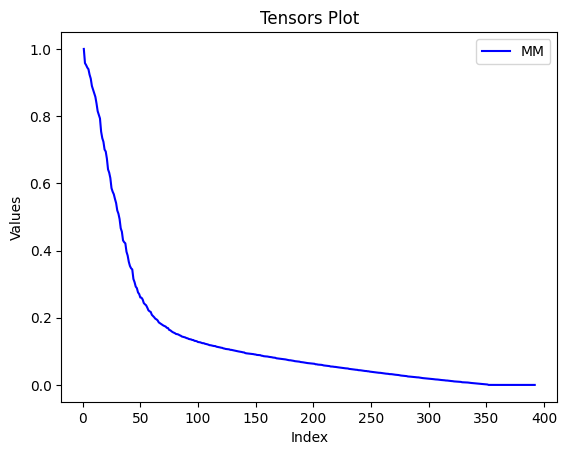

In [80]:
# Generate the x-axis values
x_values = torch.arange(1, len(S_MM) + 1)

# Plot the tensor values
plt.plot(x_values, S_MM, color='blue', label='MM')

# Set labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Tensors Plot')

# Add a legend
plt.legend()

# Display the plot
plt.show()

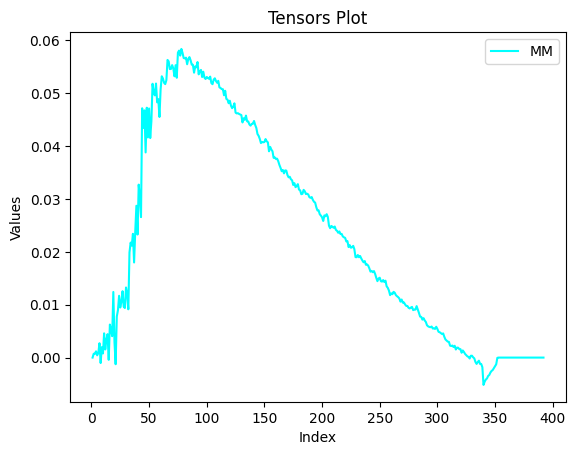

In [ ]:
# Generate the x-axis values
x_values = torch.arange(1, len(S_CRS) + 1)

# Plot the tensor values
plt.plot(x_values, S_CRS-S_MM, color='cyan', label='MM')

# Set labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Tensors Plot')

# Add a legend
plt.legend()

# Display the plot
plt.show()